# Visualising Results from Training and Evaluation
This notebook is used to generate the graphs, figures etc. needed from the actions files used previously during training and evaluation of models.

In [4]:
#Extracting info from config files
import configparser
import os
import numpy as np
import matplotlib.pyplot as plt

data_path = os.path.join('pyperbot_v2', 'logs', 'proper_convergence_results')


dttg_list = []
reward_list = []
config = configparser.ConfigParser()


for i in range(1, 253):
    config.read(os.path.join(data_path, 'run_results_' + str(i) + '.ini'))    
    dttg_list.append(config['DISTANCE']['distance_travelled_to_goal']) if config['TERMINATION']['termination'] != 'not done' else None
    reward_list.append(config['REWARD']['cum_reward']) if config['TERMINATION']['termination'] != 'not done' else None

print(dttg_list)

['0.05068247827422567', '0.293642837723195', '0.7915172573039211', '0.4918529983075972', '0.4294198334369126', '1.9887410665246565', '1.6975349499185661', '0.2448336915544953', '0.3112133354851139', '0.7139455690148928', '0.07676031983206144', '0.14768337258432318', '3.2453724643627124', '-0.202779005360485', '0.38717581513844124', '0.4102391480846572', '2.910877887600119', '0.7667024220398391', '0.6819432503650464', '3.2093971729598043', '1.5669874260059125', '2.748707625324289', '0.8021624963465568', '-0.20064333262154133', '2.110632679295128', '0.3543228196501005', '0.08155817217756312', '0.46948821298990495', '0.75747832008489', '0.48449198616841294', '0.2773458825501116', '0.9771973039645223', '0.11600314913680787', '-0.20019723548278545', '-0.20011019420556408', '0.37334305438678683', '-0.03475332059884906', '-0.1079283490569285', '0.09473107235017686', '0.37968680227520135', '-0.05305357229134344', '4.000195667940215', '0.15346449263324935', '0.9350731882651466', '2.980306249404

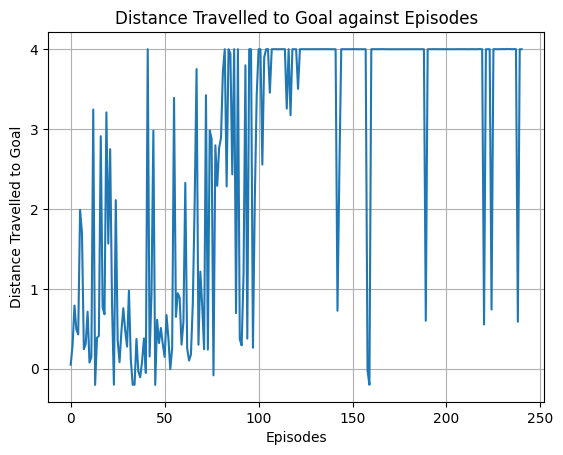

In [5]:
#plot of distance vs episodes
plt.plot(range(len(dttg_list)), [float(i) for i in dttg_list])
plt.title('Distance Travelled to Goal against Episodes')
plt.xlabel('Episodes')
plt.ylabel('Distance Travelled to Goal')
plt.grid()
plt.savefig('pyperbot_v2/results/PPO/plots/dttg.png')


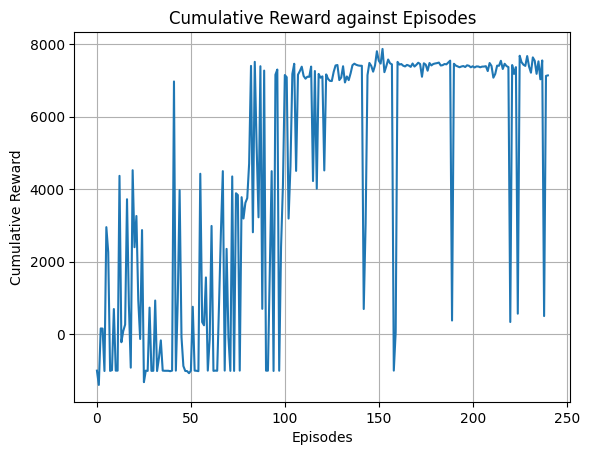

In [6]:
plt.plot(range(len(reward_list)), [float(i) for i in reward_list])
plt.title('Cumulative Reward against Episodes')
plt.xlabel('Episodes')
plt.ylabel('Cumulative Reward')
plt.grid()
plt.savefig('pyperbot_v2/results/PPO/plots/reward.png')


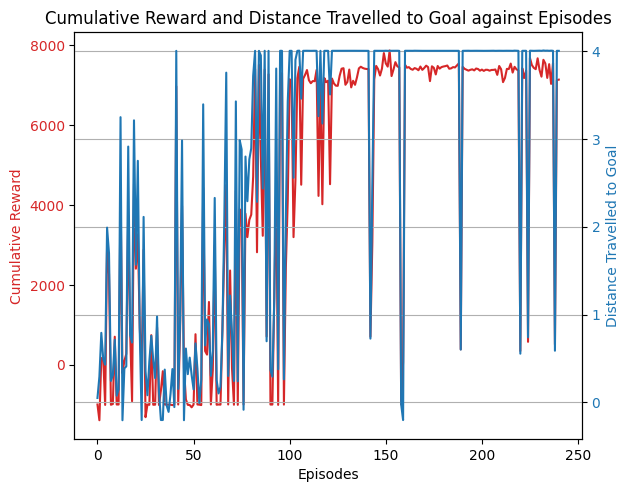

In [7]:
#Comparing Cumulative Reward vs Distance Travelled to Goal (two different axes) #use semilog y
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Episodes')
ax1.set_ylabel('Cumulative Reward', color=color)
ax1.plot(range(len(reward_list)), [float(i) for i in reward_list], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Distance Travelled to Goal', color=color)
ax2.plot(range(len(dttg_list)), [float(i) for i in dttg_list], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Cumulative Reward and Distance Travelled to Goal against Episodes')
plt.grid()
plt.savefig('pyperbot_v2/results/PPO/plots/reward_dttg.png')


['0.0005667126499950484', '0.0004624830161337635', '0.00044769513482583866', '0.0006140778309660855', '0.0004962916540433642', '0.0006410619888467002', '0.0006094665891416738', '0.0007337151498564099', '0.0007832580058035616', '0.0005146997346348345', '0.0005546255934738356', '0.0006082829398032263', '0.0006490706275336088', '0.0005711665878525898', '0.0005919937795376846', '0.0005960690098810905', '0.0005105810028581397', '0.0007323874255633787', '0.000572147226336116', '0.0007463922237982686', '0.0005887484082993602', '0.0006230641683134173', '0.0006844923757873684', '0.0006061817344050036', '0.0005257809455741252', '0.0004779686874109881', '0.0004474016533944019', '0.00041761326244726303', '0.0005035976059841826', '0.0004148254092858312', '0.00045709484292737597', '0.0004455742530882979', '0.00040785523200094536', '0.0006250470332992411', '0.0006795166789036925', '0.0004863910904775196', '0.0004908022552413754', '0.0004695327258320433', '0.0004845668194356368', '0.000436719670364180

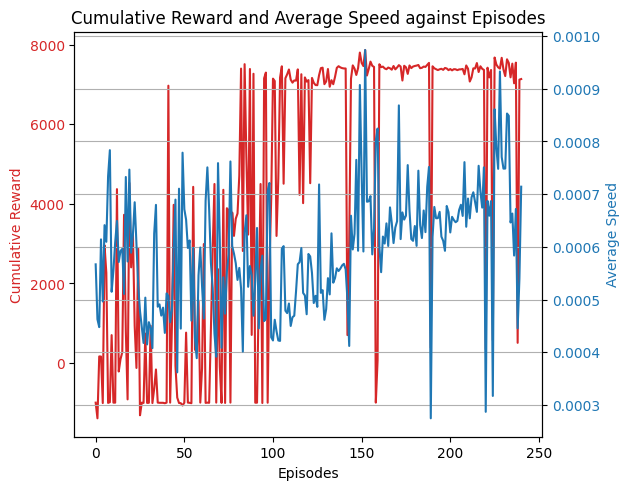

In [8]:
#average speed vs episodes
speed_list = []
for i in range(1, 253):
    config.read(os.path.join(data_path, 'run_results_' + str(i) + '.ini'))    
    speed_list.append(config['DISTANCE']['average_speed']) if config['TERMINATION']['termination'] != 'not done' else None

print(speed_list)

#comparison of average speed vs rewards against episodes
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Episodes')
ax1.set_ylabel('Cumulative Reward', color=color)
ax1.plot(range(len(reward_list)), [float(i) for i in reward_list], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Average Speed', color=color)
ax2.plot(range(len(speed_list)), [float(i) for i in speed_list], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.title('Cumulative Reward and Average Speed against Episodes')
plt.grid()
plt.savefig('pyperbot_v2/results/PPO/plots/reward_speed.png')


['5567', '8000', '8000', '20000', '7360', '20000', '20000', '5450', '8000', '8000', '6282', '5381', '20000', '2757', '8000', '8000', '20000', '8000', '8000', '20000', '20000', '20000', '8000', '1358', '20000', '8000', '4150', '3950', '8000', '6450', '2800', '8000', '2840', '2786', '637', '3470', '2660', '2860', '2770', '3720', '3351', '18039', '3060', '8000', '20000', '1974', '8000', '5360', '3670', '8000', '6160', '8000', '5721', '5930', '4950', '20000', '8000', '8000', '20000', '4981', '8000', '20000', '6060', '6168', '5580', '8000', '20000', '20000', '3942', '20000', '8000', '3600', '20000', '3300', '20000', '20000', '5390', '20000', '20000', '20000', '20000', '20000', '19067', '20000', '17618', '20000', '20000', '17437', '8000', '18402', '4020', '3632', '20000', '20000', '4480', '16319', '19271', '4890', '20000', '20000', '17541', '14716', '20000', '20000', '18246', '17587', '20000', '15665', '17900', '19716', '15893', '13692', '14767', '13363', '17173', '20000', '14213', '20000', 

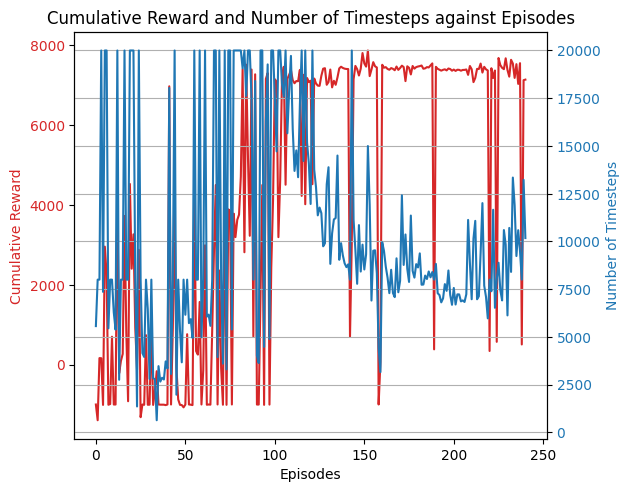

In [9]:
#comparison of number of timesteps vs rewards against episodes
timesteps_list = []
for i in range(1, 253):
    config.read(os.path.join(data_path, 'run_results_' + str(i) + '.ini'))    
    timesteps_list.append(config['TIMESTEPS']['timestep']) if config['TERMINATION']['termination'] != 'not done' else None

print(timesteps_list)

#comparison of number of timesteps vs rewards against episodes
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Episodes')
ax1.set_ylabel('Cumulative Reward', color=color)
ax1.plot(range(len(reward_list)), [float(i) for i in reward_list], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Number of Timesteps', color=color)
ax2.plot(range(len(timesteps_list)), [float(i) for i in timesteps_list], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.title('Cumulative Reward and Number of Timesteps against Episodes')
plt.grid()
plt.savefig('pyperbot_v2/results/PPO/plots/reward_timesteps.png')





In [10]:
#speed against reward - using cumulative distance travelled/timesteps against cumulative reward against episodes


[[-0.09528263627810828, -0.6629415606723883, 0.05286499170638801], [-0.42037111230306656, -1.0848027423849587, 0.05452971835709878], [-0.7965085942838729, 0.20490729035680663, 0.05564810699562828], [-0.5052586880580887, -0.34740455896677713, 0.05196439776478118], [-0.6235633641897553, -1.3179550188522249, 0.055381755976796475], [-2.144650474220062, -0.9563782986158491, 0.052881886073812216], [-1.753782430098656, 0.6069158886313496, 0.05194067796398212], [-0.40108446785056273, -1.208959283487209, 0.051698587854539284], [-0.6112154656393088, 1.6502395875414717, 0.05120125959281375], [-0.8703978132569369, -1.1474529901542736, 0.06106608770264953], [-0.14945208072271562, -0.8428960974965504, 0.051774444725281796], [-0.2063852586244418, -0.752485457641267, 0.05435867836975833], [-3.4224548470538303, 0.7681595402210574, 0.05122641302332688], [0.16560706204905562, -0.6208164456010858, 0.05531409784353379], [-0.4578393942166265, -0.8043158532027836, 0.05187741295032577], [-0.45436934209589386,

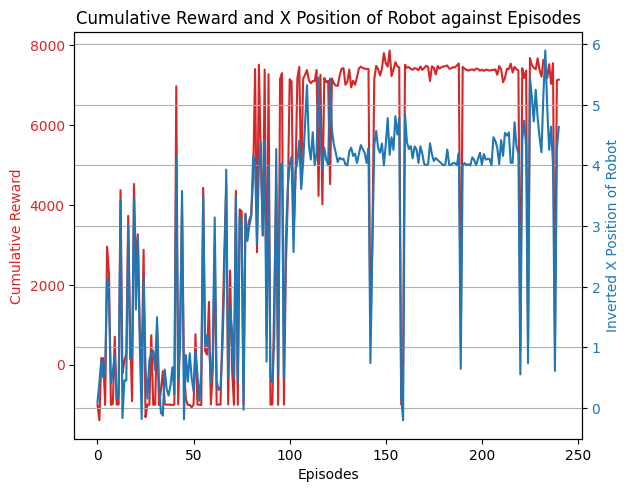

In [11]:
#Comparison of x and y position of robot against rewards against episodes
x_pos = []
y_pos = []
snake_pos_vals = []

for i in range(1, 253):
    config.read(os.path.join(data_path, 'run_results_' + str(i) + '.ini'))    
    snake_pos_str = config.get('SNAKE', 'snake_pos')
    snake_pos_str = snake_pos_str.strip('(').strip(')')
    snake_pos_values = snake_pos_str.split(', ')
    snake_pos_ints = [float(value) for value in snake_pos_values]
    snake_pos_vals.append(snake_pos_ints) if config['TERMINATION']['termination'] != 'not done' else None
    x_pos.append(config['SNAKE']['snake_pos'][0]) if config['TERMINATION']['termination'] != 'not done' else None
    y_pos.append(config['SNAKE']['snake_pos'][1]) if config['TERMINATION']['termination'] != 'not done' else None

print(snake_pos_vals)
x_pos = [-float(snake_pos_vals[i][0]) for i in range(len(snake_pos_vals))]
y_pos = [float(snake_pos_vals[i][1]) for i in range(len(snake_pos_vals))]


#comparison of x position of robot vs rewards against episodes
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Episodes')
ax1.set_ylabel('Cumulative Reward', color=color)
ax1.plot(range(len(reward_list)), [float(i) for i in reward_list], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Inverted X Position of Robot', color=color)
ax2.plot(range(len(x_pos)), x_pos, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.title('Cumulative Reward and X Position of Robot against Episodes')
plt.grid()
plt.savefig('pyperbot_v2/results/PPO/plots/reward_xpos.png')




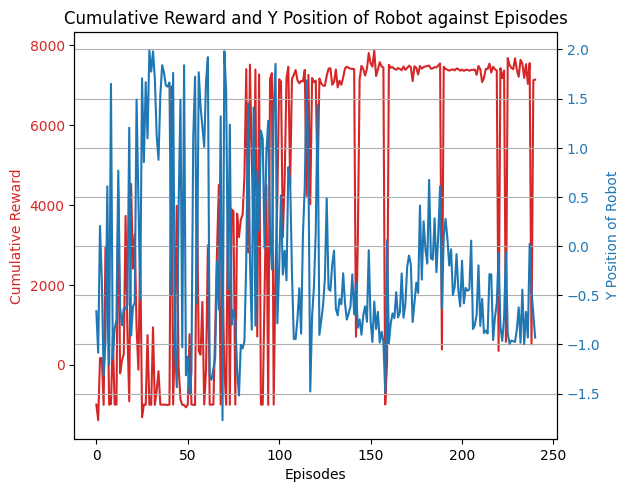

In [12]:
#comparison of yposition of robot vs rewards against episodes
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Episodes')
ax1.set_ylabel('Cumulative Reward', color=color)
ax1.plot(range(len(reward_list)), [float(i) for i in reward_list], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Y Position of Robot', color=color)
ax2.plot(range(len(y_pos)), y_pos, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.title('Cumulative Reward and Y Position of Robot against Episodes')
plt.grid()
plt.savefig('pyperbot_v2/results/PPO/plots/reward_ypos.png')


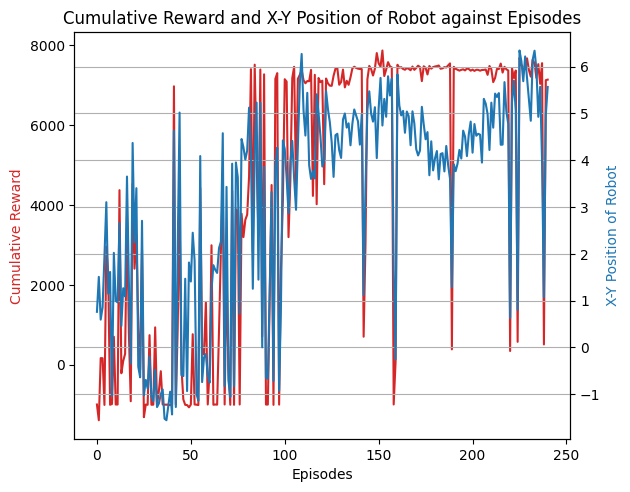

In [13]:
#Comparison of x-yposition of robot against rewards against episodes

x_sub_y = [x_pos[i] - y_pos[i] for i in range(len(x_pos))]

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Episodes')
ax1.set_ylabel('Cumulative Reward', color=color)
ax1.plot(range(len(reward_list)), [float(i) for i in reward_list], color=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('X-Y Position of Robot', color=color)
ax2.plot(range(len(x_sub_y)), x_sub_y, color=color)
fig.tight_layout()
plt.title('Cumulative Reward and X-Y Position of Robot against Episodes')
plt.grid()
plt.savefig('pyperbot_v2/results/PPO/plots/reward_xsuby.png')



['#{"t_start": 1713293713.4518607', 'r', '-500.6393', '-894.763', '1161.6534', '158.45059', '-1511.2198', '3953.8677', '2265.8591', '-1506.8853', '-989.0156', '697.0984', '-1500.9015', '-1501.2308', '5368.046', '-717.97424', '90.94693', '267.2217', '3723.1423', '802.98926', '-918.9128', '4523.117', '2401.1824', '3261.724', '929.97485', '-628.3882', '2873.2632', '-1818.1146', '-1500.6108', '-1508.8627', '736.102', '-1507.2183', '-1504.9873', '931.37634', '-1511.2925', '-1151.5651', '-666.836', '-1500.1045', '-1504.8374', '-1504.9424', '-1505.2161', '-1515.8853', '-1500.6072', '7969.332', '-1500.8953', '912.90063', '3973.4211', '-576.59515', '-873.82837', '-1509.395', '-1514.1428', '-1571.5771', '-1502.2878', '759.69434', '-1500.5295', '-1504.841', '-1515.4392', '4425.7305', '338.0138', '248.6466', '1567.8137', '-1500.3896', '-136.47168', '2987.123', '-1507.1125', '-1500.126', '-1504.7466', '859.90125', '2852.3303', '4497.549', '-1500.142', '2355.194', '-93.66556', '-1506.9723', '4351.55

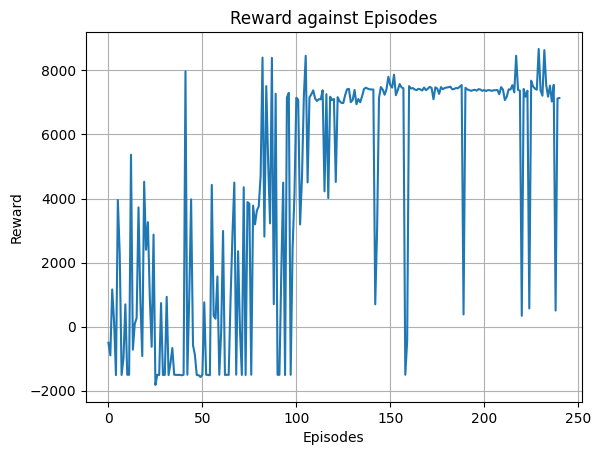

In [15]:
#Using the reward from monitor.csv
reward_list = []
with open('pyperbot_v2/logs/proper_convergence_results/monitor.csv', 'r') as f:
    for line in f:
        reward_list.append(line.split(',')[0])
print(reward_list)

reward_list = [float(i) for i in reward_list[2:]]

#plot of distance vs episodes
plt.plot(range(len(reward_list)), reward_list)
plt.title('Reward against Episodes')
plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.grid()
plt.savefig('pyperbot_v2/results/PPO/plots/reward_monitor.png')



0         0.626078
1         1.318716
2         2.171357
3         2.913104
4         3.792380
           ...    
7994   -429.348833
7995   -426.796812
7996   -425.358136
7997   -422.733702
7998   -918.913280
Name:  0.20827194900761015.1, Length: 7999, dtype: float64


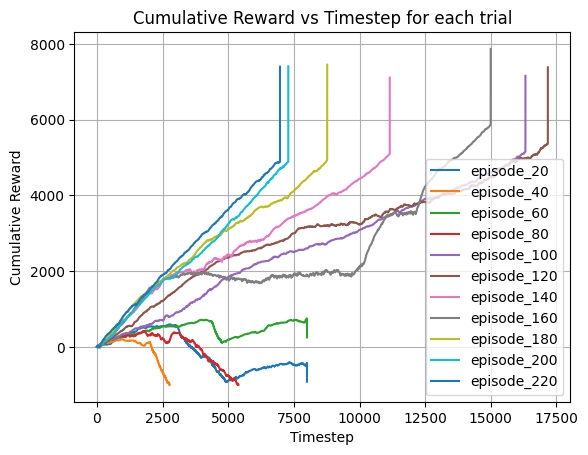

In [17]:
#reading episode CSVs
import pandas as pd

reward_path = "pyperbot_v2/logs/proper_convergence_results/rewards/"
episode_list = [f'episode_{i}' for i in range(20, 240, 20)]
cum_rewards = []
for i in range(20, 240, 20):
    df = pd.read_csv(os.path.join(reward_path, 'episode_' + str(i) + '.csv'))
    fourth_column_data = df.iloc[:, 3]
    cum_rewards.append(fourth_column_data)

print(cum_rewards[0])

#plot cum rewards against timestep for each episode
plt.figure()
for i in range(len(cum_rewards)):
    plt.plot(cum_rewards[i])
plt.xlabel('Timestep')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward vs Timestep for each trial')
plt.grid()
plt.legend(episode_list)
plt.savefig('pyperbot_v2/logs/proper_convergence_results/cum_reward_vs_timestep.png')

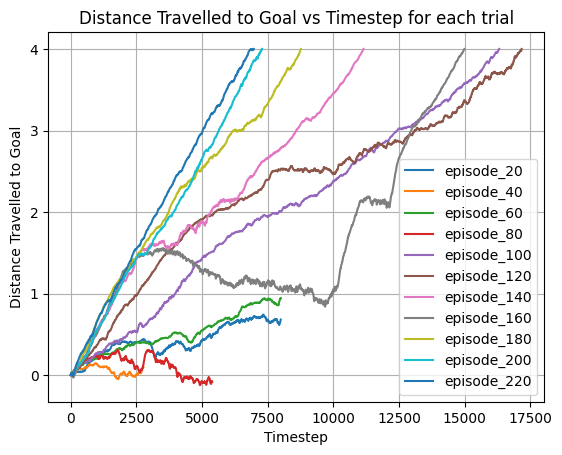

In [18]:
episode_list = [f'episode_{i}' for i in range(20, 240, 20)]
cum_dist = []
for i in range(20, 240, 20):
    df = pd.read_csv(os.path.join(reward_path, 'episode_' + str(i) + '.csv'))
    fifth_column_data = df.iloc[:, 4]
    cum_dist.append(fifth_column_data)


#plot cum rewards against timestep for each episode
plt.figure()
for i in range(len(cum_dist)):
    plt.plot(cum_dist[i])
plt.xlabel('Timestep')
plt.ylabel('Distance Travelled to Goal')
plt.title('Distance Travelled to Goal vs Timestep for each trial')
plt.grid()
plt.legend(episode_list)
plt.savefig('pyperbot_v2/logs/proper_convergence_results/cum_dist_vs_timestep.png')

In [21]:
data_path = os.path.join('pyperbot_v2', 'logs', 'actions')


new_dttg_list = []
new_reward_list = []
config = configparser.ConfigParser()


for i in range(1, 253):
    config.read(os.path.join(data_path, 'run_results_' + str(i) + '.ini'))    
    new_dttg_list.append(config['DISTANCE']['distance_travelled_to_goal']) if config['TERMINATION']['termination'] != 'not done' else None
    new_reward_list.append(config['REWARD']['cum_reward']) if config['TERMINATION']['termination'] != 'not done' else None

print(new_dttg_list)

['0.4245500095396615', '0.6937005882101621', '1.8242137988614893', '2.8216764131863403', '0.13443535656607875', '0.7435086411795613', '2.7980366772413556', '0.43786060103105395', '1.7974693624334472', '0.9833650690439795', '0.7540686101187521', '2.733931943937003', '0.9455174257002223', '2.508391888193984', '-0.14062443362860577', '2.700753865140186', '3.125238034864026', '2.5847305418244897', '0.6344871700391765', '3.3875293819135432', '0.33849610182534917', '2.2494461866603253', '0.6890392012951692', '0.016661462993051046', '-0.03328907820607441', '0.25342138313505824', '0.24460571704247958', '0.7778539875374717', '3.3472692011162946', '3.441407049726002', '0.2024665400749912', '4.000291689198463', '4.000087890602845', '3.4851775525161903', '4.000127263624332', '4.000089454042804', '4.0005119523731985', '4.000706191981728', '4.000550050362319', '4.000074711094014', '4.000286740195019', '4.000299599681107', '4.000267352038007', '4.000408544494543', '4.000194334094545', '4.000232642446

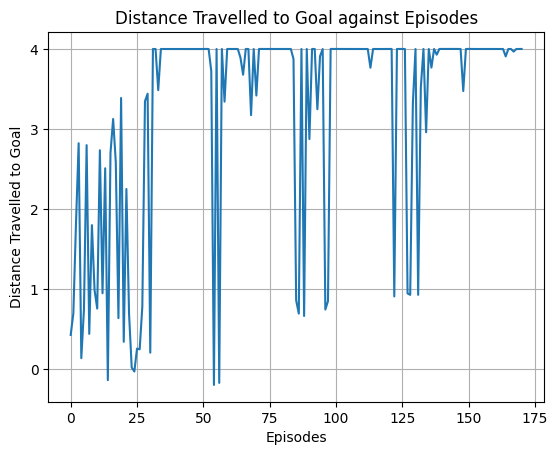

In [22]:
#plot of distance vs episodes
plt.plot(range(len(new_dttg_list)), [float(i) for i in new_dttg_list])
plt.title('Distance Travelled to Goal against Episodes')
plt.xlabel('Episodes')
plt.ylabel('Distance Travelled to Goal')
plt.grid()
plt.savefig('pyperbot_v2/results/PPO/plots/dttg.png')

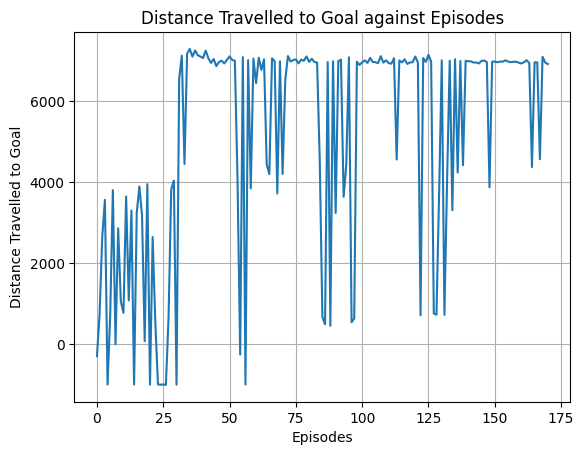

In [23]:
#plot of distance vs episodes
plt.plot(range(len(new_reward_list)), [float(i) for i in new_reward_list])
plt.title('Distance Travelled to Goal against Episodes')
plt.xlabel('Episodes')
plt.ylabel('Distance Travelled to Goal')
plt.grid()
plt.savefig('pyperbot_v2/results/PPO/plots/dttg.png')

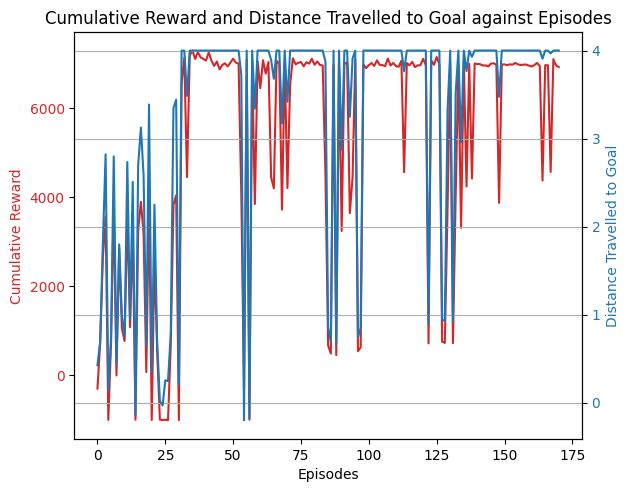

In [25]:
#plot of distance and reward vs episodes on two axes
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Episodes')
ax1.set_ylabel('Cumulative Reward', color=color)
ax1.plot(range(len(new_reward_list)), [float(i) for i in new_reward_list], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Distance Travelled to Goal', color=color)
ax2.plot(range(len(new_dttg_list)), [float(i) for i in new_dttg_list], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.title('Cumulative Reward and Distance Travelled to Goal against Episodes')
plt.grid()
plt.savefig('pyperbot_v2/results/PPO/plots/reward_dttg.png')



In [ ]:
#average speed vs episodes
new_speed_list = []
for i in range(1, 183):
    config.read(os.path.join(data_path, 'run_results_' + str(i) + '.ini'))    
    new_speed_list.append(config['DISTANCE']['average_speed']) if config['TERMINATION']['termination'] != 'not done' else None